In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import phik

In [2]:
# Matplotlib setting to increase font size
mpl.rcParams.update({'font.size': 12})

In [3]:
# Road raw training data
raw_data = pd.read_csv('data/train.csv', index_col=0)
raw_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Use `pandas_profiling` library to create neat summary of data as html report 
```python
profile = pp.ProfileReport(raw_data, title="Profile")
profile.to_file("profile_report.html")
```

In [4]:
# Exclude columns with > 20% missing values
threshold = 0.2
data = raw_data[raw_data.columns[raw_data.isnull().mean() < threshold]]

# Create copy not to work on raw data
data = raw_data.copy()
data.shape

(1460, 80)

### Useful snippets 

- check columns with missing values (along with their total number in each column)

```data.isna().sum()[lambda x: x > 0]```

- factorize categorical values into numerical 

```df = df.apply(lambda x : pd.factorize(x)[0])```

In [5]:
# Impute NaNs with median
data.LotFrontage = data.LotFrontage.fillna(data.LotFrontage.median()) 

# Create single variable encoding if the garage is present
data["Garage"] = ~data["GarageType"].isna() * 1
data = data.drop(data.filter(regex='Garage.').columns, axis=1)

interval columns not set, guessing: ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']


<AxesSubplot:>

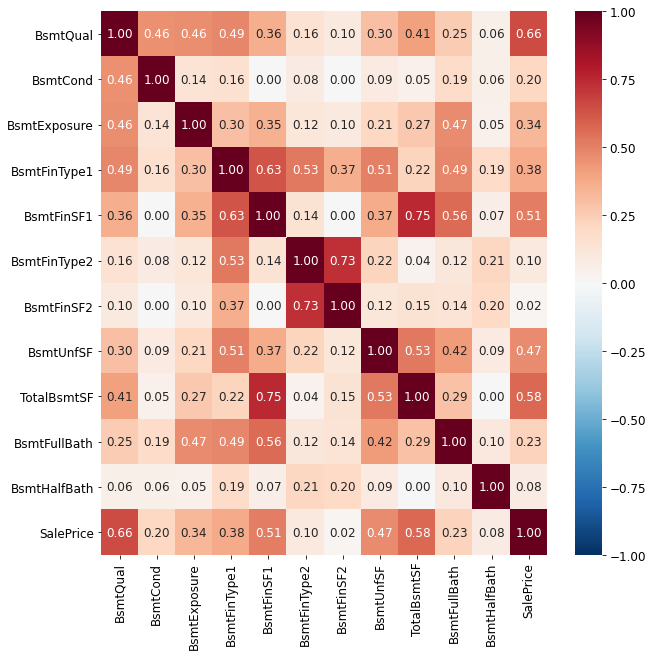

In [6]:
# Investigate correlations among basement variables and price
fig, ax = plt.subplots(figsize=(10, 10), facecolor='w')

data_bsmt = data.filter(regex='Bsmt|SalePrice')

# Use phik method to handle both categorical and numerical values
corr_bsmt = data_bsmt.phik_matrix()

sns.heatmap(corr_bsmt, annot=True, ax=ax, vmin=-1, vmax=1, cmap='RdBu_r', 
            fmt='.2f')